In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [34]:
import torch
import os
import subprocess
import aedat
import pandas as pd
from inspect import getmembers, isfunction, isclass, ismethod
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from tqdm.notebook import tqdm

<IPython.core.display.Javascript object>

In [3]:
dvs = aedat.DVSGestureData(
    "DvsGesture/user01_fluorescent.aedat", "DvsGesture/user01_fluorescent_labels.csv"
)
len(dvs.datapoints[0].events)

213025

<IPython.core.display.Javascript object>

In [5]:
data = []
for event in dvs.datapoints[0].events:
    data.append(
        [
            event.get_valid(),
            event.get_x(),
            event.get_y(),
            event.get_polarity(),
            event.get_timestamp(),
        ]
    )
df = pd.DataFrame(data=data, columns=["valid", "x", "y", "polarity", "timestamp"])
df

,valid,x,y,polarity,timestamp
0,1,82,49,1,28
1,1,92,55,0,38
2,1,92,55,0,39
3,1,92,55,0,39
4,1,99,90,1,65
...,...,...,...,...,...
213020,1,93,45,1,5044100
213021,1,92,75,1,5044153
213022,1,96,60,1,5044167
213023,1,86,85,0,5044299


<IPython.core.display.Javascript object>

In [8]:
df[df["valid"] != 1]

,valid,x,y,polarity,timestamp


<IPython.core.display.Javascript object>

In [9]:
df["polarity"].unique()

array([1, 0])

<IPython.core.display.Javascript object>

In [47]:
groups = df.groupby(pd.qcut(df.timestamp, 100))

<IPython.core.display.Javascript object>

In [50]:
tensors = []
for name, group in tqdm(groups):
    tensor = torch.zeros(128, 128)

    for idx, row in group.iterrows():
        x = row["x"]
        y = row["y"]

        tensor[x][y] = 1
    tensors.append(tensor)

  0%|          | 0/100 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

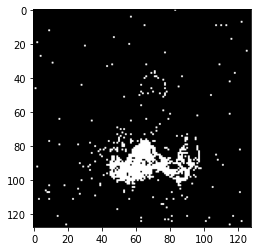

<IPython.core.display.Javascript object>

In [58]:
for idx, img in enumerate(tensors):
    plt.imshow(img, cmap=cm.Greys_r)
    plt.savefig(f"images_qcut/file_{idx}.png")

In [20]:
def aggr_pixels_to_tensors(df, window_size=1000):
    images = []

    data_length = len(df)
    no_frames = int(data_length / window_size)

    for window in tqdm(range(no_frames)):
        tensor = torch.zeros(128, 128)

        start = window * 1000
        end = window + (window * 1000)

        for idx, row in df[start:end].iterrows():
            x = row["x"]
            y = row["y"]

            tensor[x][y] = 1

        images.append(tensor)

    return images

<IPython.core.display.Javascript object>

In [25]:
images = aggr_pixels_to_tensors(df)
len(images)

  0%|          | 0/213 [00:00<?, ?it/s]

213

<IPython.core.display.Javascript object>

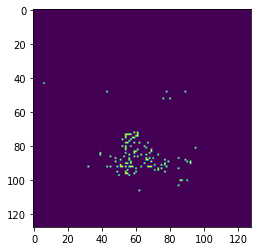

<IPython.core.display.Javascript object>

In [28]:
plt.imshow(images[150])

In [41]:
def generate_video(images):
    """
    for idx, img in enumerate(images):
        plt.imshow(img, cmap=cm.Greys_r)
        plt.savefig(f"images/file_{idx}.png")
    """
    #os.chdir("images")
    subprocess.call([
        'ffmpeg', '-framerate', '8', '-i', 'file_*.png', '-r', '30', '-pix_fmt', 'yuv420p',
        'video_name.mp4'
    ])


<IPython.core.display.Javascript object>

In [42]:
generate_video(images)

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

<IPython.core.display.Javascript object>

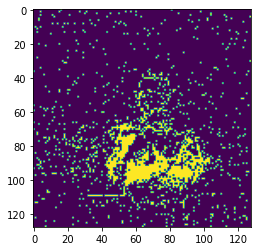

<IPython.core.display.Javascript object>

In [108]:
plt.imshow(tensor)

In [ ]:
aedat.convert_polarity_events(split_events[0])

In [ ]:
frames = []

for frame_events in split_events:
    frames.append(aedat.convert_polarity_events(frame_events))
    

In [ ]:
frames = aedat.get_frames_from_events(dvs.datapoints[0].events)

In [ ]:
frames[0].shape

In [ ]:
len(frames)

In [ ]:
plt.imshow(torch.clip(frames[0].to_dense(), 0, 1))

In [ ]:
dense_frames = []
for frame in frames:
    dense_frames.append(torch.clip(frames[5].to_dense(), 0, 1))
len(dense_frames)

In [ ]:
plt_frames = []

fig = plt.figure()
for i in range(len(dense_frames)):
    plt_frames.append([plt.imshow(dense_frames[i], cmap=cm.Greys_r, animated=True)])

ani = animation.ArtistAnimation(
    fig, plt_frames, interval=50, blit=True, repeat_delay=1000
)
# ani.save('movie.mp4')
plt.show()

In [ ]:
!ls

In [ ]:
data = aedat.AEDAT("DvsGesture/user01_fluorescent.aedat")
# data = aedat.AEDAT4("user02_fluorescent.aedat4")

In [ ]:
events = aedat.convert_polarity_events(data.polarity_events)
events.shape

In [ ]:
events

In [ ]:
event = events[0]
event

In [ ]:
plt.imshow(event.to_dense())

In [ ]:
events._indices().shape

In [ ]:
aggr_event = None
events_to_aggr = torch.empty(size=(0, 128, 128))
for n in tqdm(range(10000)):
    dense_tensor = events[n].to_dense().reshape(1, 128, 128)
    events_to_aggr = torch.cat((events_to_aggr, dense_tensor))

In [ ]:
aggr_event = torch.sum(events_to_aggr, axis=0)
print(aggr_event.shape)

In [ ]:
plt.imshow(torch.clip(aggr_event, 0, 1))

In [ ]:
df = pd.read_csv("DvsGesture/user01_fluorescent_labels.csv")
df

In [ ]:
img = torch.empty(size=(0, 128, 128))

for i in range(0, 1000000, 1000):
    dense_tensor = torch.reshape(events[i].to_dense(), (1, 128, 128))
    img = torch.cat((img, dense_tensor))


In [ ]:
img[img > 0]

In [ ]:
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(1000):
    frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()

In [ ]:
dvs = aedat.DVSGestureData(
    "DvsGesture/user01_fluorescent.aedat",
    "DvsGesture/user01_fluorescent_labels.csv"
)

In [ ]:
dvs.datapoints[0].label

In [ ]:
aedat.get_frames_from_events(dvs.datapoints[0].events, 1000)

In [ ]:
sizes = []
for element in dvs.datapoints:
    label = element.label
    events = aedat.convert_polarity_events(element.events)
    sizes.append(events.shape)

In [ ]:
sizes

In [ ]:
events.shape

In [ ]:
dvs.datapoints

In [ ]:
total_size = sum([ size[0] for size in sizes])
total_size

In [ ]:
img = torch.empty(size=(0, 128, 128))

for i in range(0, events.shape[0], 10000):
    dense_tensor = torch.reshape(events[i].to_dense(), (1, 128, 128))
    img = torch.cat((img, dense_tensor))

In [ ]:
img.shape

In [ ]:
img_length = img.shape[0]
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(img_length):
    frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
# ani.save('movie.mp4')
plt.show()